## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Network Traffic
**Steps**:
1. Extract Features from Dataset:
    - Load `network_traffic.csv` .
2. Isolation Forest Model
3. Display Anomalies

Anomaly counts:
anomaly
 1    999
-1     31
Name: count, dtype: int64

Sample Anomalies:
      duration   bytes_sent  bytes_received  anomaly
5    38.719955  1328.233106     1587.017218       -1
66   23.890369  1725.006076     2144.745249       -1
94   43.948796  1822.381211     1675.491627       -1
128  44.114147  1483.180863     2071.260470       -1
129  33.787522  1196.419216     1675.123140       -1


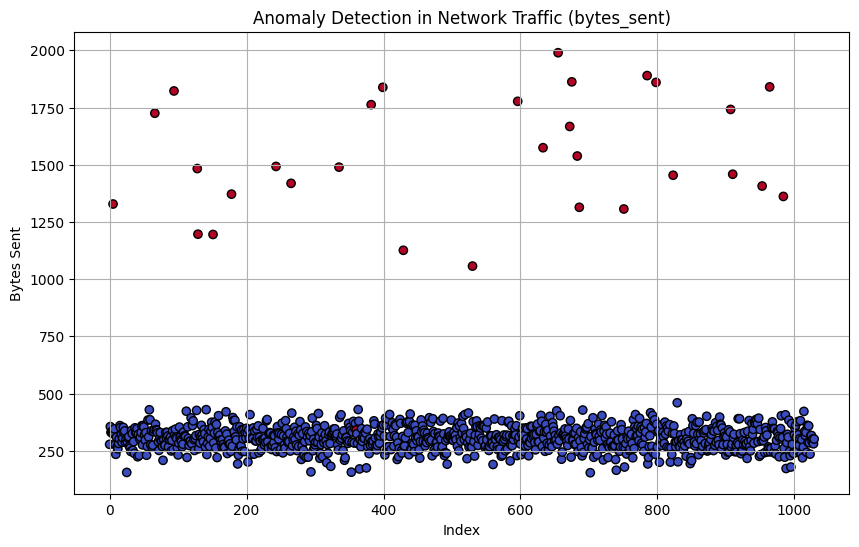

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Generate Synthetic Network Traffic Dataset
np.random.seed(42)

# Simulate normal traffic
normal_data = {
    'duration': np.random.exponential(scale=2.0, size=1000),
    'bytes_sent': np.random.normal(loc=300, scale=50, size=1000),
    'bytes_received': np.random.normal(loc=500, scale=60, size=1000),
}

# Simulate anomalies
anomalies = {
    'duration': np.random.uniform(20, 50, size=30),
    'bytes_sent': np.random.uniform(1000, 2000, size=30),
    'bytes_received': np.random.uniform(1500, 2500, size=30),
}

# Create DataFrames
df_normal = pd.DataFrame(normal_data)
df_anomaly = pd.DataFrame(anomalies)

# Combine and shuffle
df = pd.concat([df_normal, df_anomaly], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Isolation Forest Model
X = df[['duration', 'bytes_sent', 'bytes_received']]
iso_forest = IsolationForest(contamination=0.03, random_state=42)
df['anomaly'] = iso_forest.fit_predict(X)

# Step 3: Display Anomalies
print("Anomaly counts:")
print(df['anomaly'].value_counts())

print("\nSample Anomalies:")
print(df[df['anomaly'] == -1].head())

# Step 4: Visualize Anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['bytes_sent'], c=(df['anomaly'] == -1), cmap='coolwarm', edgecolor='k')
plt.title('Anomaly Detection in Network Traffic (bytes_sent)')
plt.xlabel('Index')
plt.ylabel('Bytes Sent')
plt.grid(True)
plt.show()